In [1]:
from sklearn.datasets import load_iris,load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

In [2]:
RANDOM_STATUS = 42

In [3]:
iris = load_iris()

X = iris["data"]
Y = iris["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATUS)

In [4]:
svc_clf = SVC(kernel='rbf',random_state=RANDOM_STATUS)
svc_clf.fit(x_train,y_train)
svc_clf.score(x_test,y_test)

1.0

信息量: 1.000


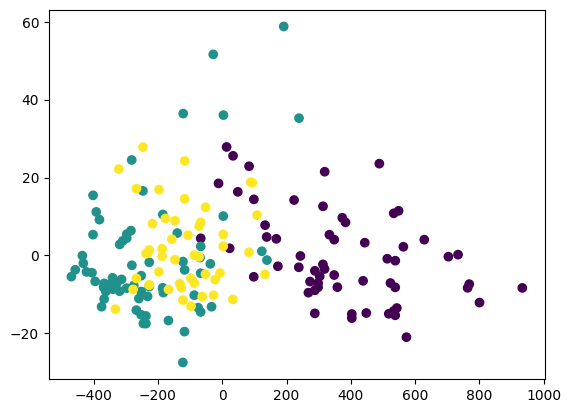

In [5]:
max_seed = [0,0]
wine = load_wine()
X = wine["data"]
Y = wine["target"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=RANDOM_STATUS)
a = PCA(n_components=2)
a.fit(X)
X_new = a.transform(X)
print("信息量: %.3f" % a.explained_variance_ratio_.sum())
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y)
X_new = StandardScaler().fit_transform(X_new)

In [6]:
SEARCH = False

if SEARCH:
    max_seed = [0]
    wine = load_wine()
    X = wine["data"]
    Y = wine["target"]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=RANDOM_STATUS)

    for gamma in np.logspace(-5, 1, num=60, base=10):
        for c in np.linspace(0.01, 5, 50):
            x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=RANDOM_STATUS)
            svc_clf = SVC(C=c,cache_size=6000,kernel='rbf',random_state=RANDOM_STATUS,tol=1e-6,gamma=gamma)
            svc_clf.fit(x_train,y_train)
            score = svc_clf.score(x_test,y_test)
            y_pred = svc_clf.predict(x_test)
            if score > max_seed[0]:
                max_seed = [score,RANDOM_STATUS,gamma,c]
                print(max_seed)

通过遍历搜索最优调参，大约在0.97（使用PCA降维）、0.93（不使用PCA降维）

In [7]:
# 有PCA降维情况下的最高准确率参数
RANDOM_STATUS = 4724
gamma = 0.057904439806024895
c = 4.694489795918367

X = wine["data"]
Y = wine["target"]

a = PCA(n_components=2)
a.fit(X)
X_new = a.transform(X)
X_new = StandardScaler().fit_transform(X_new)

x_train,x_test,y_train,y_test = train_test_split(X_new,Y,test_size=0.3,random_state=RANDOM_STATUS)
svc_clf = SVC(C=c,cache_size=6000,kernel='rbf',random_state=RANDOM_STATUS,tol=1e-6,gamma=gamma)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)
print("accuracy",svc_clf.score(x_test,y_test))
print(classification_report(y_test,y_pred))

accuracy 0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.91      1.00      0.95        20
           2       1.00      0.82      0.90        11

    accuracy                           0.96        54
   macro avg       0.97      0.94      0.95        54
weighted avg       0.97      0.96      0.96        54



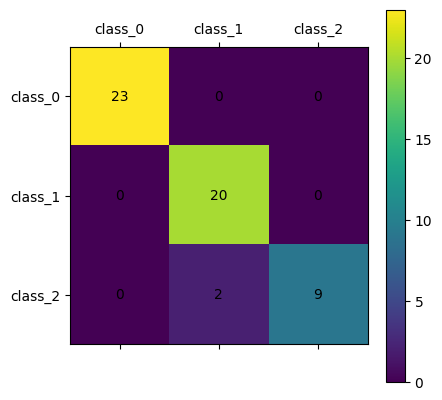

In [8]:
cf_mx = confusion_matrix(y_test,y_pred)
plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')

plt.xticks(range(len(wine["target_names"])),wine["target_names"])
plt.yticks(range(len(wine["target_names"])),wine["target_names"])
plt.colorbar()
plt.show()

信息量: 1.000


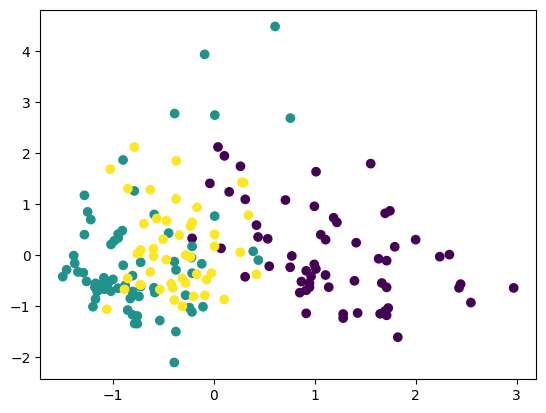

In [9]:
print("信息量: %.3f" % a.explained_variance_ratio_.sum())
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y)
plt.show()

In [10]:
# 无PCA降维情况下的最高准确率参数
RANDOM_STATUS = 4724
gamma = 1e-5
c = 0.7228571428571429

X = wine["data"]
Y = wine["target"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=RANDOM_STATUS)
svc_clf = SVC(C=c,cache_size=6000,kernel='rbf',random_state=RANDOM_STATUS,tol=1e-6,gamma=gamma)
svc_clf.fit(x_train,y_train)
svc_clf.score(x_test,y_test)
y_pred = svc_clf.predict(x_test)
print("accuracy",svc_clf.score(x_test,y_test))
print(classification_report(y_test,y_pred))

accuracy 0.9259259259259259
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.87      1.00      0.93        20
           2       1.00      0.64      0.78        11

    accuracy                           0.93        54
   macro avg       0.94      0.88      0.90        54
weighted avg       0.93      0.93      0.92        54



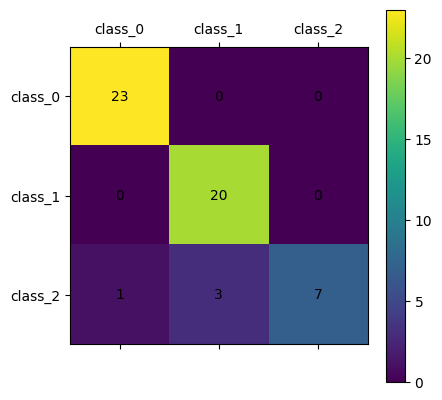

In [11]:
cf_mx = confusion_matrix(y_test,y_pred)
plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')

plt.xticks(range(len(wine["target_names"])),wine["target_names"])
plt.yticks(range(len(wine["target_names"])),wine["target_names"])
plt.colorbar()
plt.show()

In [12]:
RANDOM_STATUS = 4724
iris = load_iris()
X = iris["data"]
Y = iris["target"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=RANDOM_STATUS)

lsvc_clf = LinearSVC(random_state=RANDOM_STATUS)
lsvc_clf.fit(x_train,y_train)
lsvc_clf.score(x_test,y_test)

D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9777777777777777

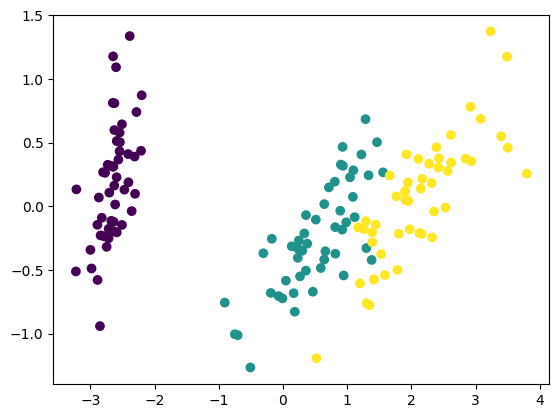

In [13]:
a = PCA(n_components=2)
a.fit(X)
X_new = a.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y)
plt.show()

In [14]:
SEARCH = False

if SEARCH:
    max_seed = [0]
    wine = load_wine()
    X = wine["data"]
    Y = wine["target"]
    for RANDOM_STATUS in range(10000):
        x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=RANDOM_STATUS)

        for c in np.linspace(0.01, 5, 50):
            lsvc_clf = LinearSVC(C=c,random_state=RANDOM_STATUS,tol=1e-6)
            lsvc_clf.fit(x_train,y_train)
            score = lsvc_clf.score(x_test,y_test)
            if score > max_seed[0]:
                max_seed = [score,RANDOM_STATUS,c]
                print(max_seed)
# 1.0 20 0.1

In [15]:
# 不使用PCA降维的情况下，可以达到100%准确率
RANDOM_STATUS = 20
c = 0.01
wine = load_wine()
X = wine["data"]
Y = wine["target"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=RANDOM_STATUS)
lsvc_clf = LinearSVC(C=c,random_state=RANDOM_STATUS,tol=1e-6)
lsvc_clf.fit(x_train,y_train)
score = lsvc_clf.score(x_test,y_test)
y_pred = lsvc_clf.predict(x_test)
print("accuracy",lsvc_clf.score(x_test,y_test))
print(classification_report(y_test,y_pred))

accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


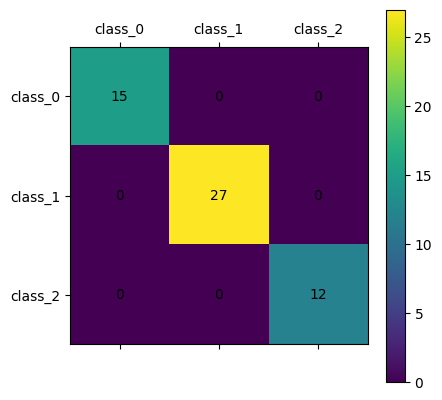

In [16]:
cf_mx = confusion_matrix(y_test,y_pred)
plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')

plt.xticks(range(len(wine["target_names"])),wine["target_names"])
plt.yticks(range(len(wine["target_names"])),wine["target_names"])
plt.colorbar()
plt.show()